In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
GS = "/Users/davidhoffman/desktop/stocks_download/GS_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(GS, index_col="Date", parse_dates=True)

In [3]:
#Only keep closing price of the day
df.drop(['Open','High','Low'], axis = 1, inplace = True)
df.drop(['Name'], axis = 1, inplace = True)
df.drop(['Volume'], axis = 1, inplace = True)

In [4]:
train = df.Close[2500:-31]
test = df.Close[len(train)+2500:]
train_diff = train.diff()

In [5]:
#ARIMA model

ar1ma1 = ARIMA(train.dropna().values, (1,2,1)).fit()
ar1ma1_diff = ARIMA(train_diff.dropna().values, (1,1,1)).fit()

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [6]:
#Predictions out of sample

predictions_ar1ma1 = ar1ma1.predict(start=len(train),end=len(train)+31)
full_pred_ar_ar1ma1 = train[len(train)-1]+np.cumsum(predictions_ar1ma1)

predictions_ar1ma1_diff = ar1ma1_diff.predict(start=len(train),end=len(train)+31)
full_pred_ar1ma1_diff = train[len(train)-1]+np.cumsum(predictions_ar1ma1_diff)


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


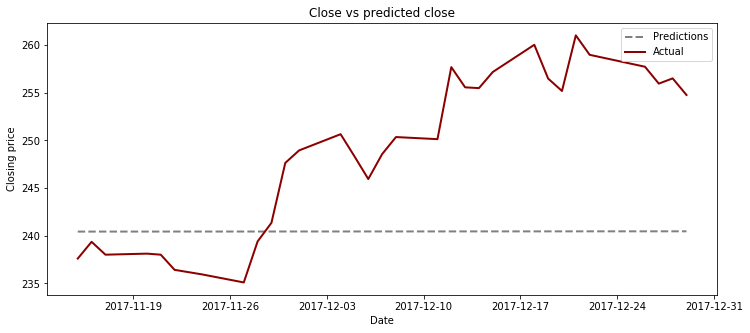

In [7]:
#Actual close price vs full_pred_ar1ma1_diff, out of sample

fig, ax = plt.subplots(figsize=(12,5))
date_ticks = test.index
ax.plot(date_ticks, full_pred_ar1ma1_diff[2:], lw=2, color='grey', ls='dashed', label = 'Predictions')
ax.plot(date_ticks, test, lw=2, color='darkred', label = 'Actual')
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Close vs predicted close")
plt.legend()
plt.show();

In [8]:
#Function to create a model and evaluate its predictions
#Arima model,
#input will be parameter p and df/col

def price_preds_p(df,days, p, column = 'Close'):
    #df = dataframe
    #column = Close --> predicting closing price
    #days --> how many days do you want to predict
    #p --> paramater p --> lags
    
    #Seperate into train and test
    train = df.Close[:-days]
    test = df.Close[len(train):]
    
    
    #Difference the train set
    #train_diff = train.diff()
    
    #fit model
    ar1ma1 = ARIMA(train.values, (p,2,1)).fit(disp=0)
    
    #predict out of sample ---> test set
    preds = ar1ma1.predict(start=len(train), end=len(train)+days-1)

    #Add predictions to the last value in train set
    full_preds = train[len(train)-1] + np.cumsum(preds)
   
    for i in range(days):
        print ("actual", test[i], "predicted", full_preds[i])
        print ("difference (pred - actual)", full_preds[i]-test[i])
    return np.var(full_preds)

results for price preds p function:
p=:
1.    0.004345001535578772

2.    0.0034985237621212094

3.    0.00452138116930596

4.    0.0073039167950536025

5.    0.014790984047964974

6.    0.009266575375453334

7.    0.010224646837947162

8.    0.027918079364850162

9.    0.04855250276397046

10.   0.04927565725958586

11.   0.04732463398094426

12.   0.04745722050024483

13.   0.05185252215646854

14.   0.048293020780350894

15.   0.04047066591073391

16.   0.030693392841559006







In [24]:
price_preds_p(df,days=10, p=2, column = 'Close')

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


actual 257.17 predicted 255.68003375273864
difference (pred - actual) -1.4899662472613784
actual 260.02 predicted 255.65565438626803
difference (pred - actual) -4.364345613731956
actual 256.48 predicted 255.65556468346617
difference (pred - actual) -0.8244353165338509
actual 255.18 predicted 255.6557755138943
difference (pred - actual) 0.4757755138942912
actual 261.01 predicted 255.6558028602902
difference (pred - actual) -5.3541971397097825
actual 258.97 predicted 255.6558375827005
difference (pred - actual) -3.3141624172995137
actual 257.72 predicted 255.65587319409335
difference (pred - actual) -2.0641268059066817
actual 255.95 predicted 255.65590870866257
difference (pred - actual) -0.2940912913374234
actual 256.5 predicted 255.65594422207235
difference (pred - actual) -0.8440557779276503
actual 254.76 predicted 255.65597973621158
difference (pred - actual) 0.8959797362115864


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


5.2801133984632706e-05

In [25]:
df.isnull().sum()

Close    0
dtype: int64

In [9]:
for i in range(1,10):
    price_preds_p(df,days=1, p=i, column = 'Close')

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


actual 254.76 predicted 256.02258913453375
difference (pred - actual) 1.262589134533755
actual 254.76 predicted 256.0368319746948
difference (pred - actual) 1.276831974694801


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


actual 254.76 predicted 256.02611390083985
difference (pred - actual) 1.266113900839855


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


actual 254.76 predicted 256.0809658255349
difference (pred - actual) 1.3209658255349268
actual 254.76 predicted 255.89884751101658
difference (pred - actual) 1.1388475110165928


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


actual 254.76 predicted 255.95488848993065
difference (pred - actual) 1.194888489930662


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


actual 254.76 predicted 255.91036677397906
difference (pred - actual) 1.1503667739790728


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


actual 254.76 predicted 255.83587395964486
difference (pred - actual) 1.0758739596448663
actual 254.76 predicted 255.9555516016322
difference (pred - actual) 1.1955516016322179


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:

def price_preds_p(df,days, p, column = 'Close'):
    #df = dataframe
    #column = Close --> predicting closing price
    #days --> how many days do you want to predict
    #p --> paramater p --> lags
    
    #Seperate into train and test
    train = df.Close[:-days]
    test = df.Close[len(train):]
    
    
    #Difference the train set
    #train_diff = train.diff()
    
    #fit model
    ar1ma1 = ARIMA(train.values, (p,2,1)).fit(disp=0)
    
    #predict out of sample ---> test set
    preds = ar1ma1.predict(start=len(train), end=len(train)+days-1)

    #Add predictions to the last value in train set
    full_preds = train[len(train)-1] + np.cumsum(preds)
   
    for i in range(days):
        print ("actual", test[i], "predicted", full_preds[i])
        print ("difference (pred - actual)", full_preds[i]-test[i])
    return np.var(full_preds)

#price_preds_p(df,days=1, p=4, column = 'Close')

In [18]:
ar1ma1 = ARIMA(df.Close, (2,2,1)).fit(disp=0)
df['close_diff_1']=df.Close.diff()
df['close_diff_2']=df.close_diff_1.diff()
r2_score(df.close_diff_2[2:], ar1ma1.fittedvalues)


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conv

0.5250664412058581

In [23]:
price_preds_p(df=df,days=2, p=2, column = 'Close')
r2_score(df.close_diff_2[len(df.close_diff_2)-2], ar1ma1.fittedvalues)


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


actual 256.5 predicted 257.92381561668424
difference (pred - actual) 1.4238156166842373
actual 254.76 predicted 257.8257354581082
difference (pred - actual) 3.065735458108236


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


TypeError: Singleton array 2.32000000000005 cannot be considered a valid collection.